In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

### Gradient Descent

<b>Gradient descent</b>, also known as <b>steepest descent</b>, is an optimization algorithm for finding the local minimum of a function. To find a local minimum, the function "steps" in the  direction of the negative of the gradient. <b>Gradient ascent</b> is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. The algorithm of gradient descent can be outlined as follows:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; choose $\alpha_k$ to minimize $f(x_k+\alpha_k s_k)$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha_k s_k$ <br>
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+2$

In [4]:
f = lambda x: x**3-2*x**2+2

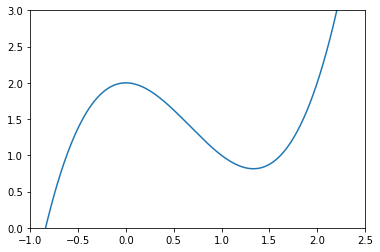

In [5]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

We can see from plot above that our local minimum is gonna be near around 1.4 or 1.5 (on the x-axis), but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$

In [6]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print ("Number of steps:", len(x_list))

Local minimum occurs at: 1.3334253508453249
Number of steps: 17


The figures below show the route that was taken to find the local minimum.

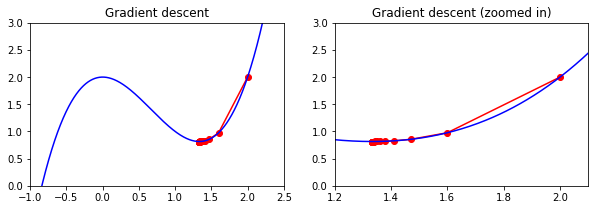

In [5]:
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("Gradient descent (zoomed in)")
plt.show()

You'll notice that the step size (also called learning rate) in the implementation above is constant, unlike the algorithm in the pseudocode. Doing this makes it easier to implement the algorithm. However, it also presents some issues: If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all.

Let's now consider an example which is a little bit more complicated. Consider a simple linear regression where we want to see how the temperature affects the noises made by crickets. We have a data set of cricket chirp rates at various temperatures. First we'll load that data set in and plot it:

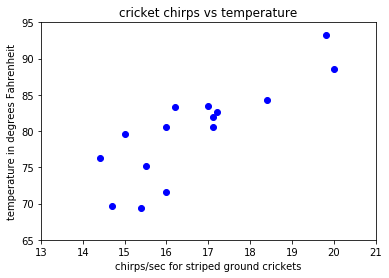

In [7]:
#Load the dataset
data = np.loadtxt('SGD_data.txt', delimiter=',')
 
#Plot the data
plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.xlim([13,21])
plt.ylim([65,95])
plt.show()

Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points. The function that we are trying to minimize in this case is:

$J(\theta_0,\theta_1) = {1 \over 2m} \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$

In this case, our gradient will be defined in two dimensions:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

Below, we set up our function for h, J and the gradient:

In [8]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x

def J(x,y,m,theta_0,theta_1):
    returnValue = 0
    for i in range(m):
        returnValue += (h(theta_0,theta_1,x[i])-y[i])**2
    returnValue = returnValue/(2*m)
    return returnValue

def grad_J(x,y,m,theta_0,theta_1):
    returnValue = np.array([0.,0.])
    for i in range(m):
        returnValue[0] += (h(theta_0,theta_1,x[i])-y[i])
        returnValue[1] += (h(theta_0,theta_1,x[i])-y[i])*x[i]
    returnValue = returnValue/(m)
    return returnValue

Now, we'll load our data into the x and y variables;

In [9]:
x = data[:, 0]
y = data[:, 1]
m = len(x)

And we run our gradient descent algorithm (without adaptive step sizes in this example):

In [10]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.001 # step size
precision = 0.01
num_steps = 0
s_k = float("inf")

while np.linalg.norm(s_k) > precision:
    num_steps += 1
    theta_old = theta_new
    s_k = -grad_J(x,y,m,theta_old[0],theta_old[1])
    theta_new = theta_old + n_k * s_k

print("Local minimum occurs where:")
print("theta_0 =", theta_new[0] )
print("theta_1 =", theta_new[1])
print("This took", num_steps, "steps to converge")

Local minimum occurs where:
theta_0 = 24.194781816187188
theta_1 = 3.352796386699456
This took 326536 steps to converge


For comparison, let's get the actual values for $\theta_0$ and $\theta_1$:

In [22]:
actualvalues = sp.stats.linregress(x,y)
print("Actual values for theta are:")
print("theta_0 =", actualvalues.intercept)
print("theta_1 =", actualvalues.slope)

Actual values for theta are:
theta_0 = 25.232304983426005
theta_1 = 3.291094567947566


So we see that our values are relatively close to the actual values (even though our method was pretty slow). If you look at the source code of [linregress](https://github.com/scipy/scipy/blob/master/scipy/stats/_stats_mstats_common.py), it uses the convariance matrix of x and y to compute fastly. Below, you can see a plot of the line drawn with our theta values against the data:

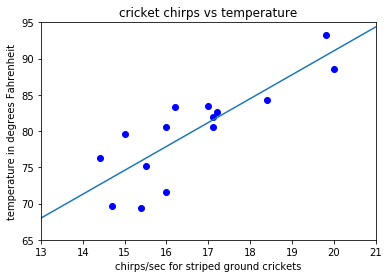

In [14]:
xx = np.linspace(0,21,1000)
plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.plot(xx,h(theta_new[0],theta_new[1],xx))
plt.xlim([13,21])
plt.ylim([65,95])
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.show()